## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""
#!nvidia-smi

'\nYour code here\n'

In [2]:
import os
import keras

# Try to enable GPU (optional)

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape(len(x), -1)
        x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)) * 2 - 1
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
outp

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 25s 506us/step - loss: 1.7338 - acc: 0.3858 - val_loss: 1.5490 - val_acc: 0.4455
Epoch 2/100
50000/50000 [==============================] - 6s 130us/step - loss: 1.4866 - acc: 0.4735 - val_loss: 1.4771 - val_acc: 0.4808
Epoch 3/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.3660 - acc: 0.5168 - val_loss: 1.4009 - val_acc: 0.5076
Epoch 4/100
50000/50000 [==============================] - 6s 119us/step - loss: 1.2743 - acc: 0.5511 - val_loss: 1.3761 - val_acc: 0.5173
Epoch 5/100
50000/50000 [==============================] - 6s 118us/step - loss: 1.1925 - acc: 0.5781 - val_loss: 1.3799 - val_acc: 0.5201
Epoch 6/100
50000/50000 [==============================] - 6s 120us/step - loss: 1.1145 - acc: 0.6046 - val_loss: 1.3624 - val_acc: 0.5260
Epoch 7/100
50000/50000 [==============================] - 6s 119us

50000/50000 [==============================] - 7s 131us/step - loss: 0.1013 - acc: 0.9665 - val_loss: 3.6517 - val_acc: 0.5289
Epoch 58/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.1076 - acc: 0.9642 - val_loss: 3.6785 - val_acc: 0.5264
Epoch 59/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.1188 - acc: 0.9616 - val_loss: 3.6354 - val_acc: 0.5241
Epoch 60/100
50000/50000 [==============================] - 7s 131us/step - loss: 0.0783 - acc: 0.9740 - val_loss: 3.7155 - val_acc: 0.5327
Epoch 61/100
50000/50000 [==============================] - 7s 131us/step - loss: 0.1016 - acc: 0.9668 - val_loss: 3.6567 - val_acc: 0.5315
Epoch 62/100
50000/50000 [==============================] - 6s 123us/step - loss: 0.0865 - acc: 0.9712 - val_loss: 3.7184 - val_acc: 0.5302
Epoch 63/100
50000/50000 [==============================] - 6s 127us/step - loss: 0.0780 - acc: 0.9739 - val_loss: 3.8052 - val_acc: 0.5258
Epoch 64/100
50000/50000 [=======

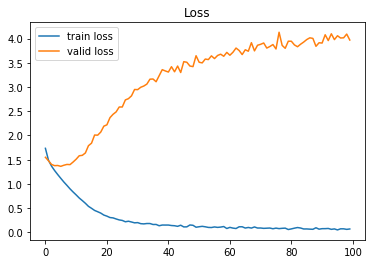

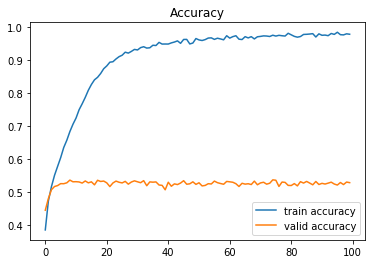

In [9]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()